## VISUALIZAÇÃO TEMPORAL COMPOSIÇÃO DOS GASES

O objetivo desse notebook é visualizar:
* Anos com dados nulos
* O comportamento da tag ao longo do tempo

Requisitos para rodar esse notebook:
* É necessário rodar '1_preprocessamento'/'0.1_analise_tags_recebidas'

In [1]:
import pandas as pd
import os
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import time

%run ..\..\..\funcoes_base_global\funcoes_plot.py

In [2]:
def path(name):
    path = os.path.join('..','1_preprocessamento','out',name)
    return(path)

def path_out(name):
    path = os.path.join('out',name)
    return(path)

In [3]:
tags = {'302B':['AI25121.PV','AI25131.PV','AI25141.PV','AI25151.PV','AI25161.PV','AI25171.PV','AI25181.PV','AI25191.PV','AI25211.PV'],
        '302A':['AI25121.PV','AI25131.PV','AI25141.PV','AI25151.PV','AI25161.PV','AI25171.PV','AI25181.PV','AI25191.PV','AI25211.PV'],
        '301B':['AI23121.PV','AI23131.PV','AI23141.PV','AI23151.PV','AI23161.PV','AI23171.PV','AI23181.PV','AI23191.PV','AI23211.PV','AI23421.PV','AI23431.PV','AI23441.PV','AI23451.PV','AI23461.PV','AI23471.PV','AI23481.PV','AI23491.PV'],
        '301A':[]}

In [5]:
df = pd.read_csv(path('df_gas.csv.gz'), compression = 'gzip', parse_dates = ['Date'], index_col = 'Date')

In [6]:
columns_drop = df.columns[df.columns.str.contains('_quality')]
data = df[tags['302A']]

### 1. Anos faltantes

In [7]:
# criando um dataframe novo cujo index são os anos
df_year = data.copy()
df_year.index = df_year.index.year

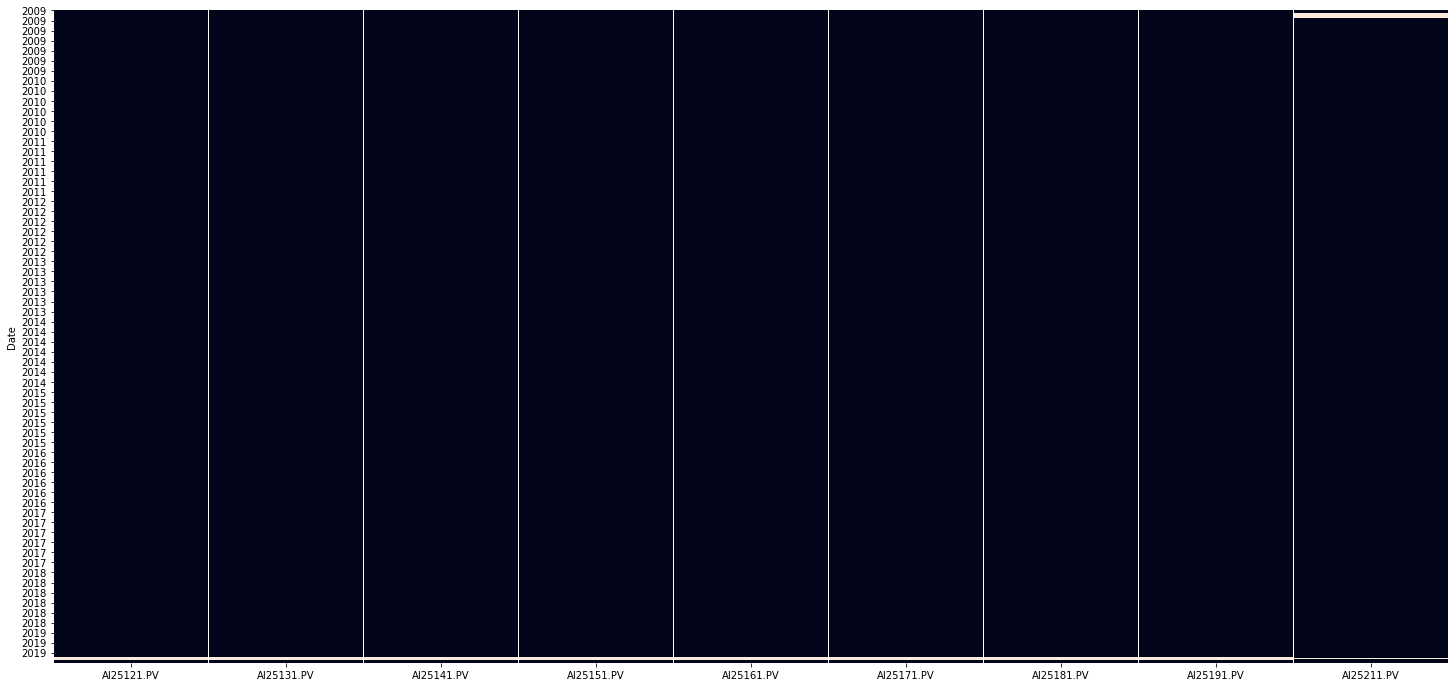

In [8]:
plt.figure(figsize = [25,12])
sns.heatmap(df_year.isnull(), cbar = False)

### 2. A partir de 2009

(5517491, 1)


C:\Users\jessica.assumpcao\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
C:\Users\jessica.assumpcao\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


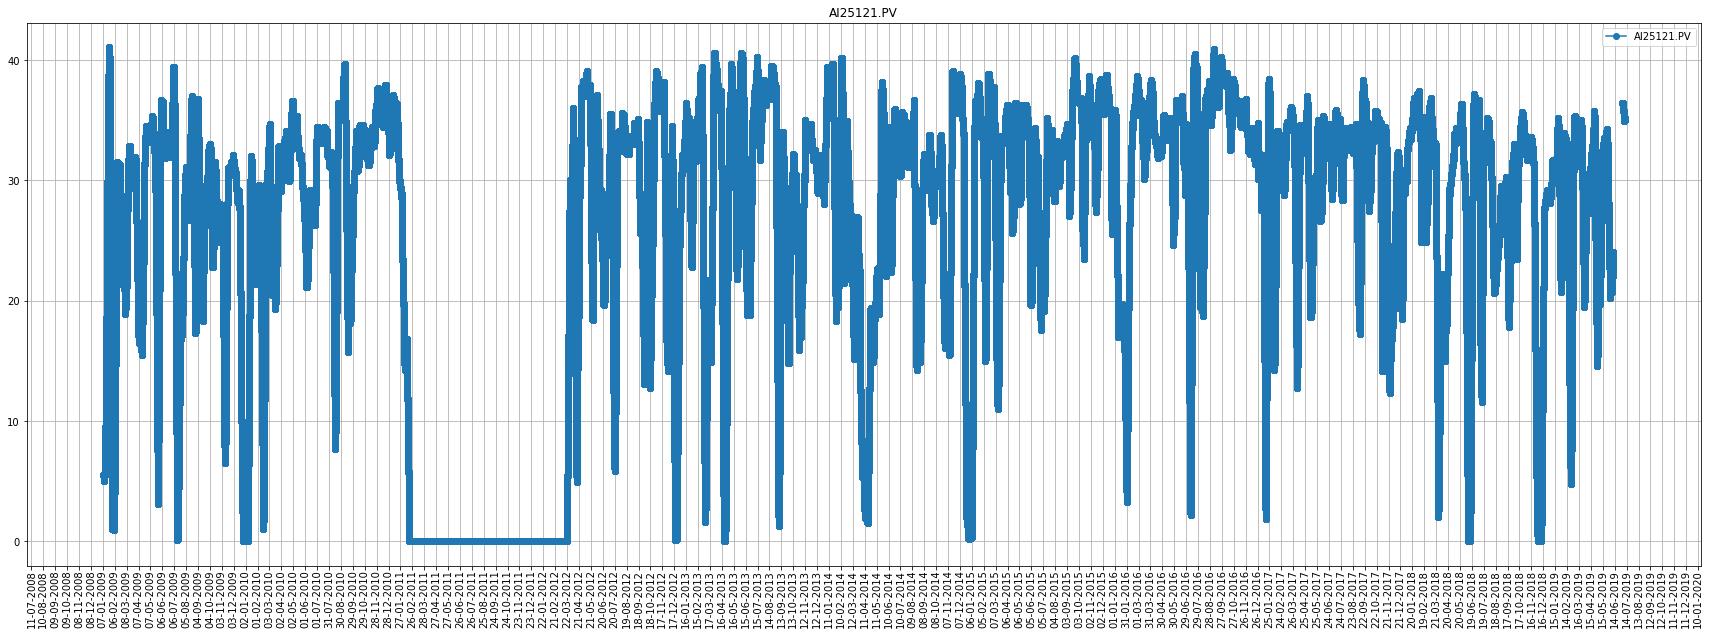

(5517491, 1)


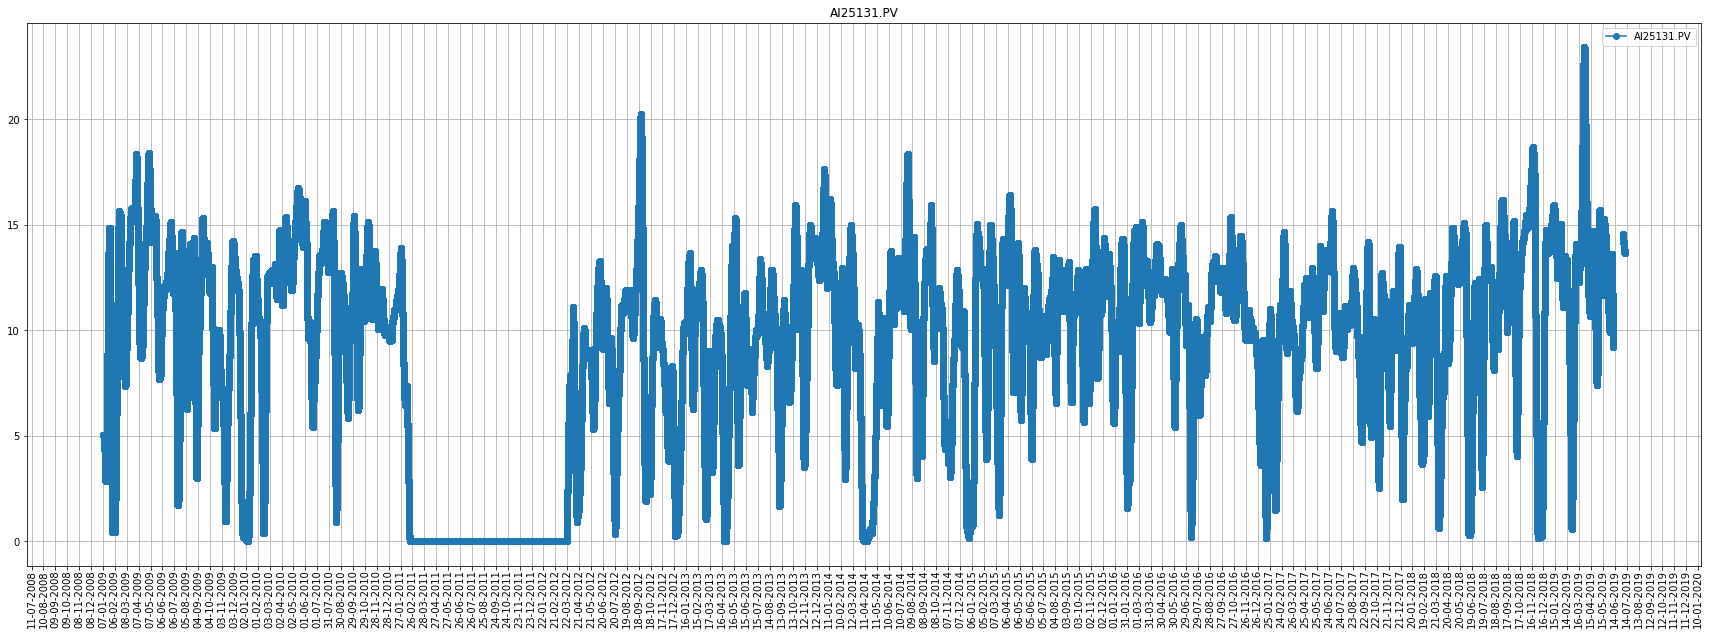

(5517491, 1)


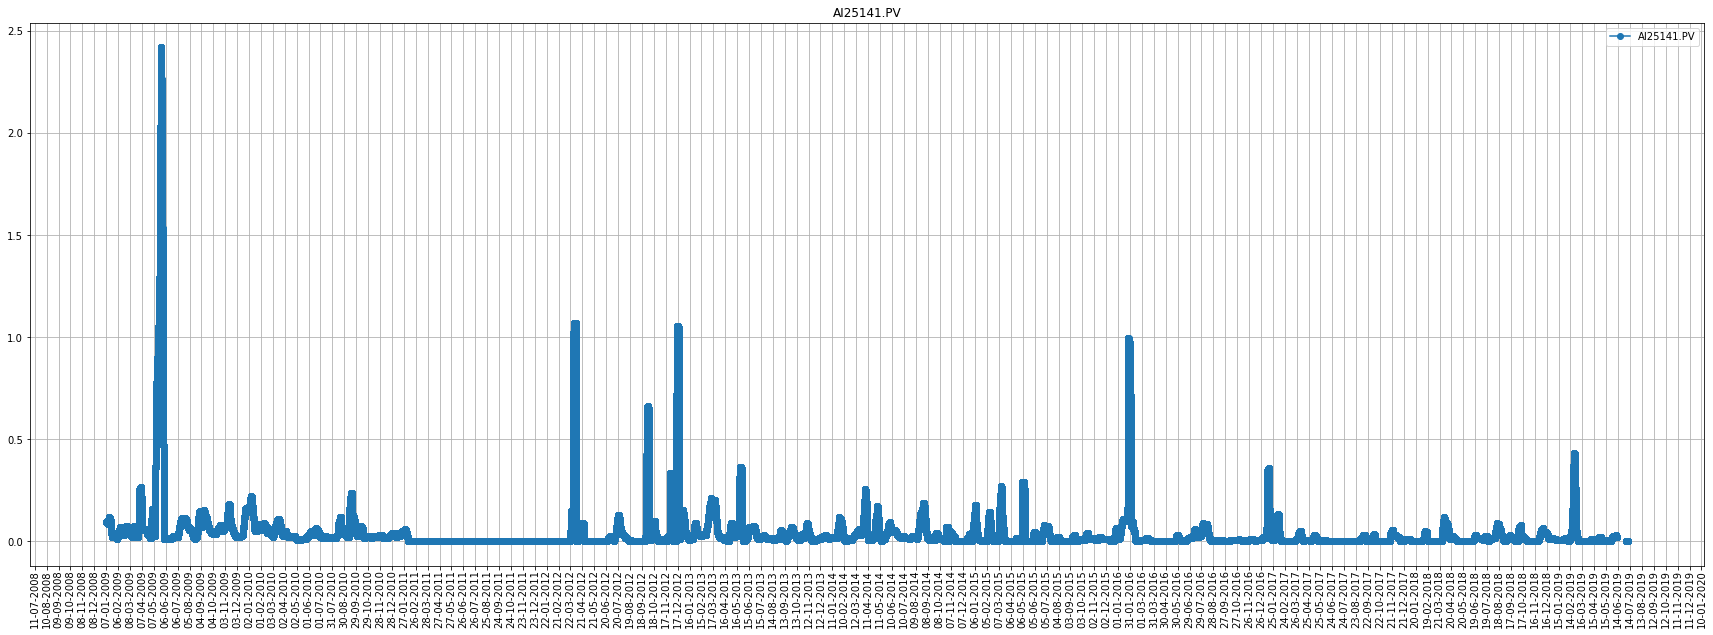

(5517491, 1)


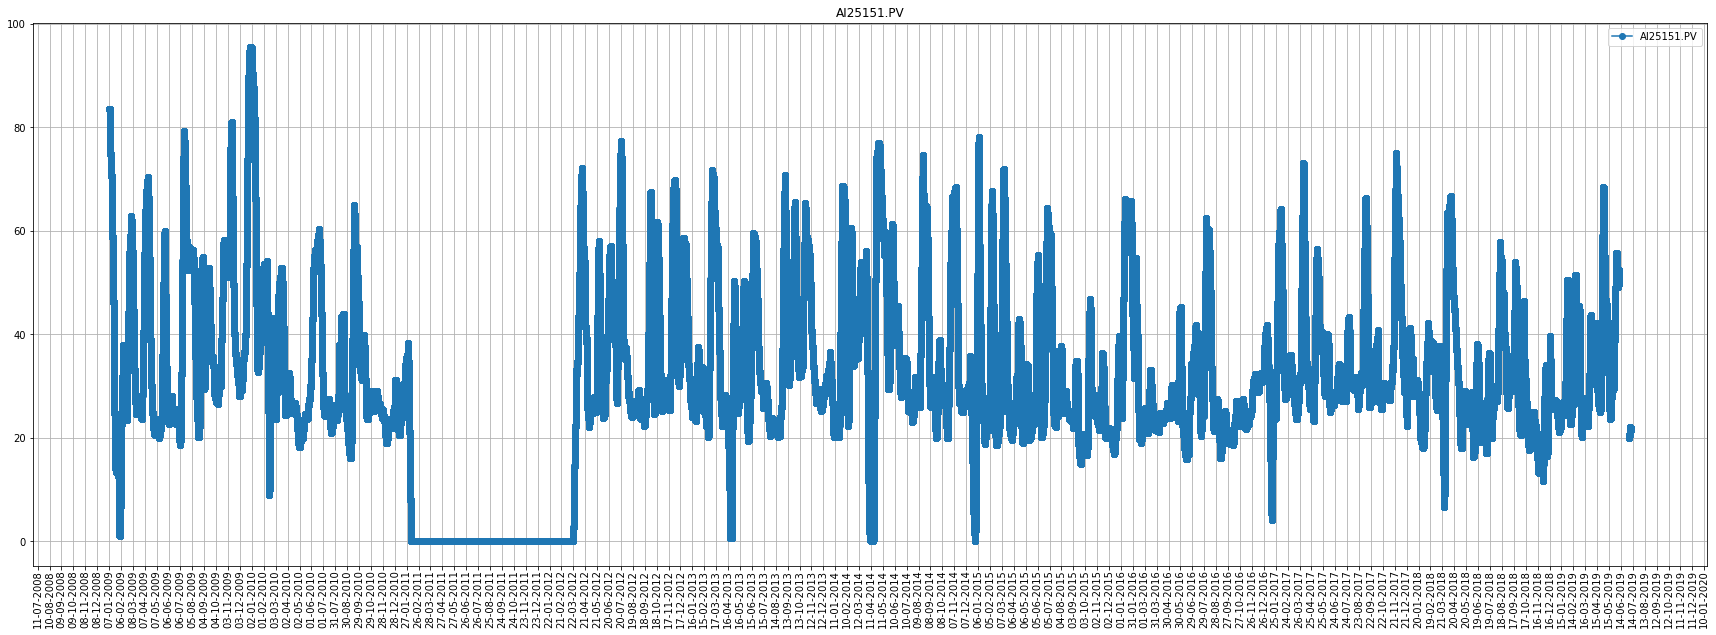

(5517491, 1)


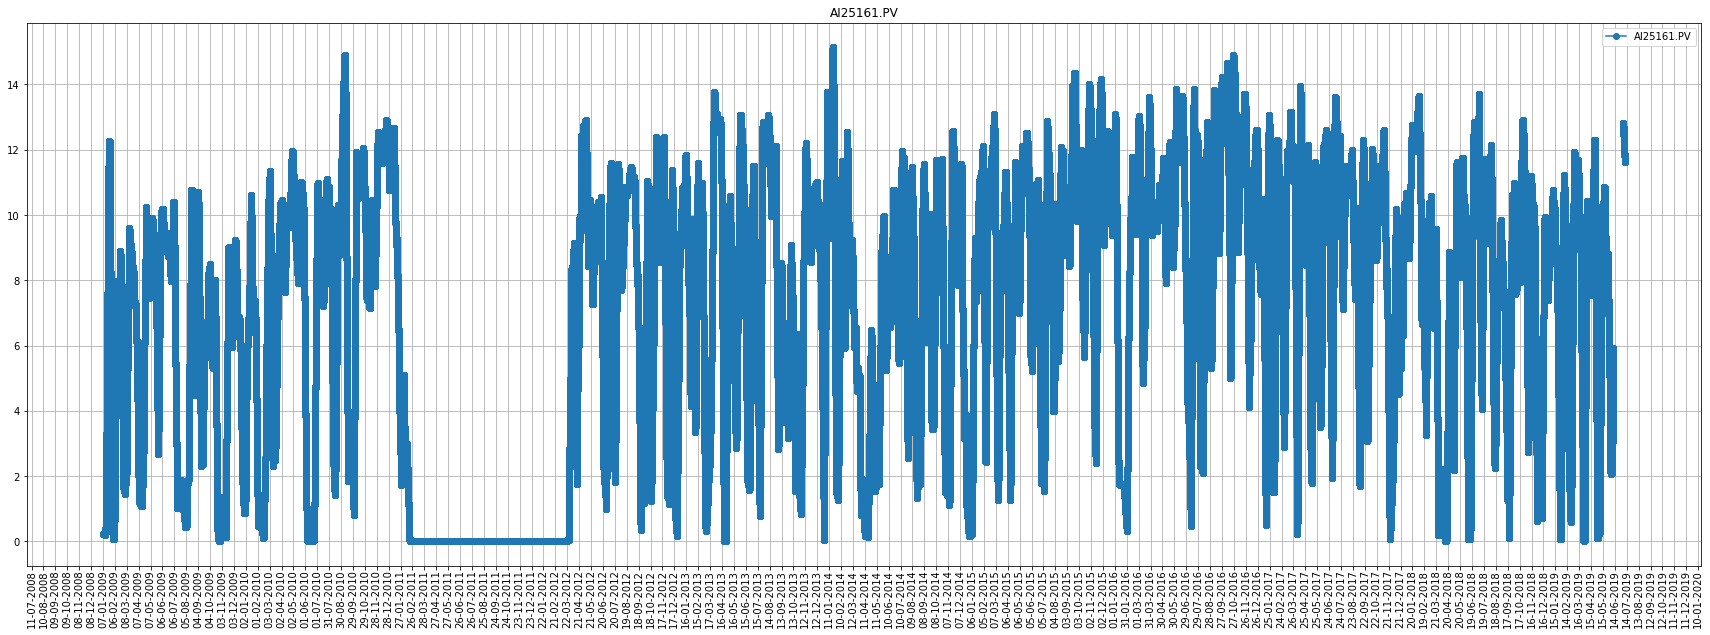

(5517491, 1)


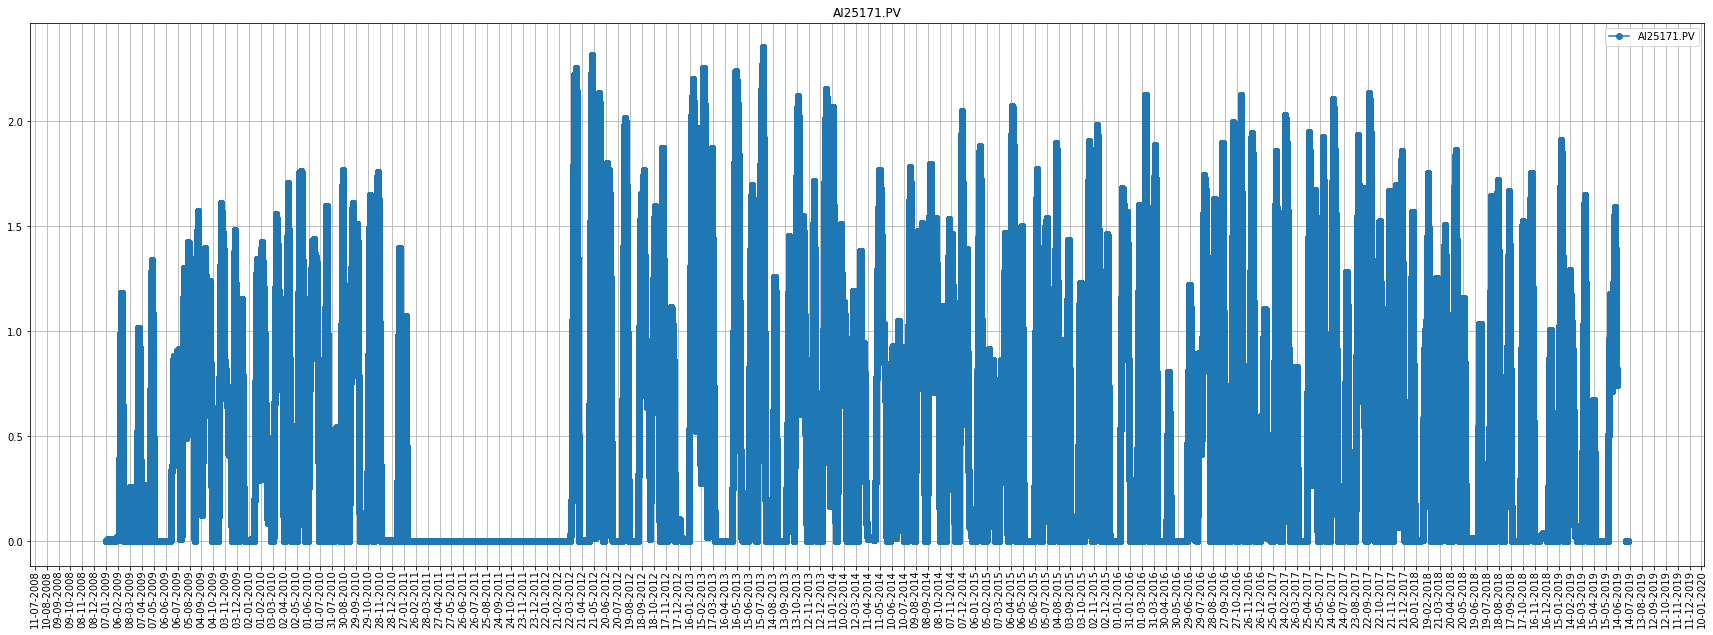

(5517491, 1)


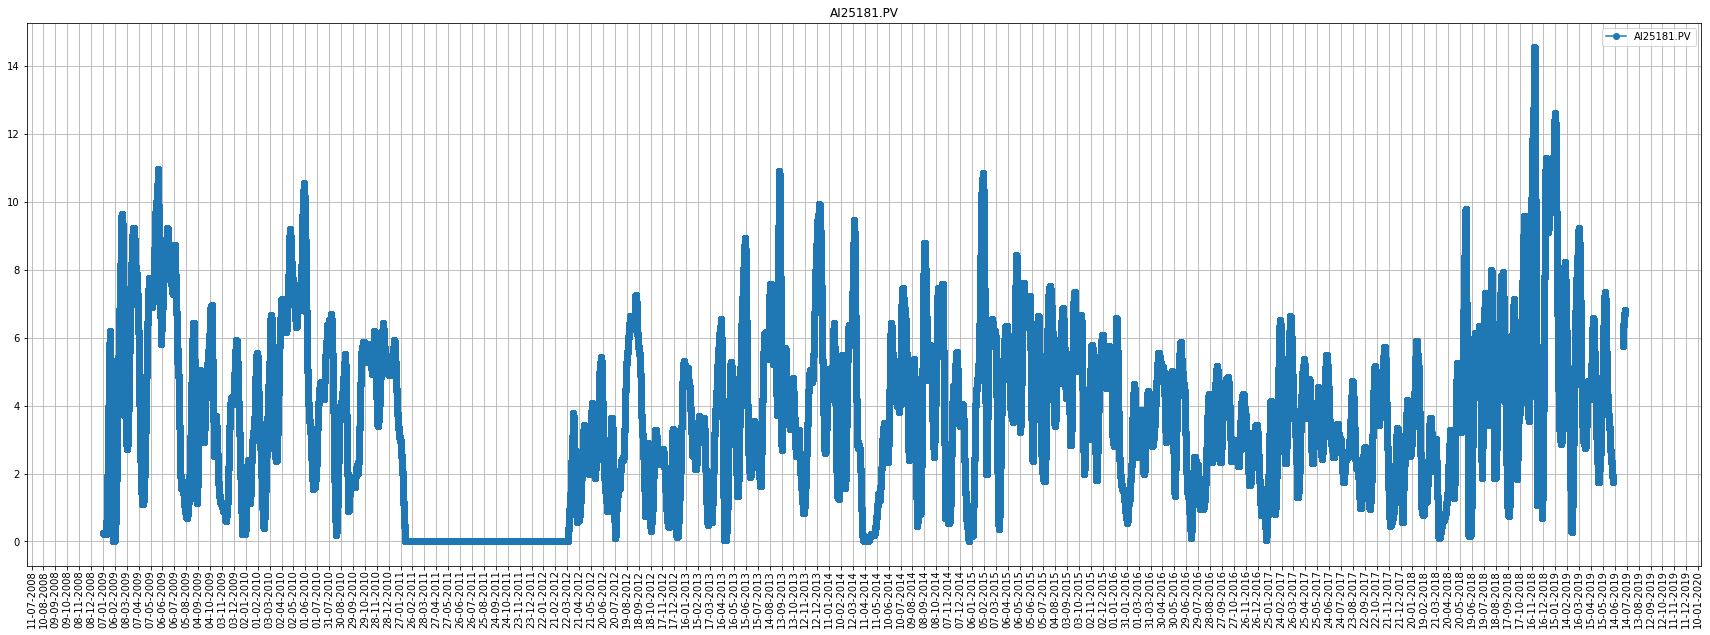

(5517491, 1)


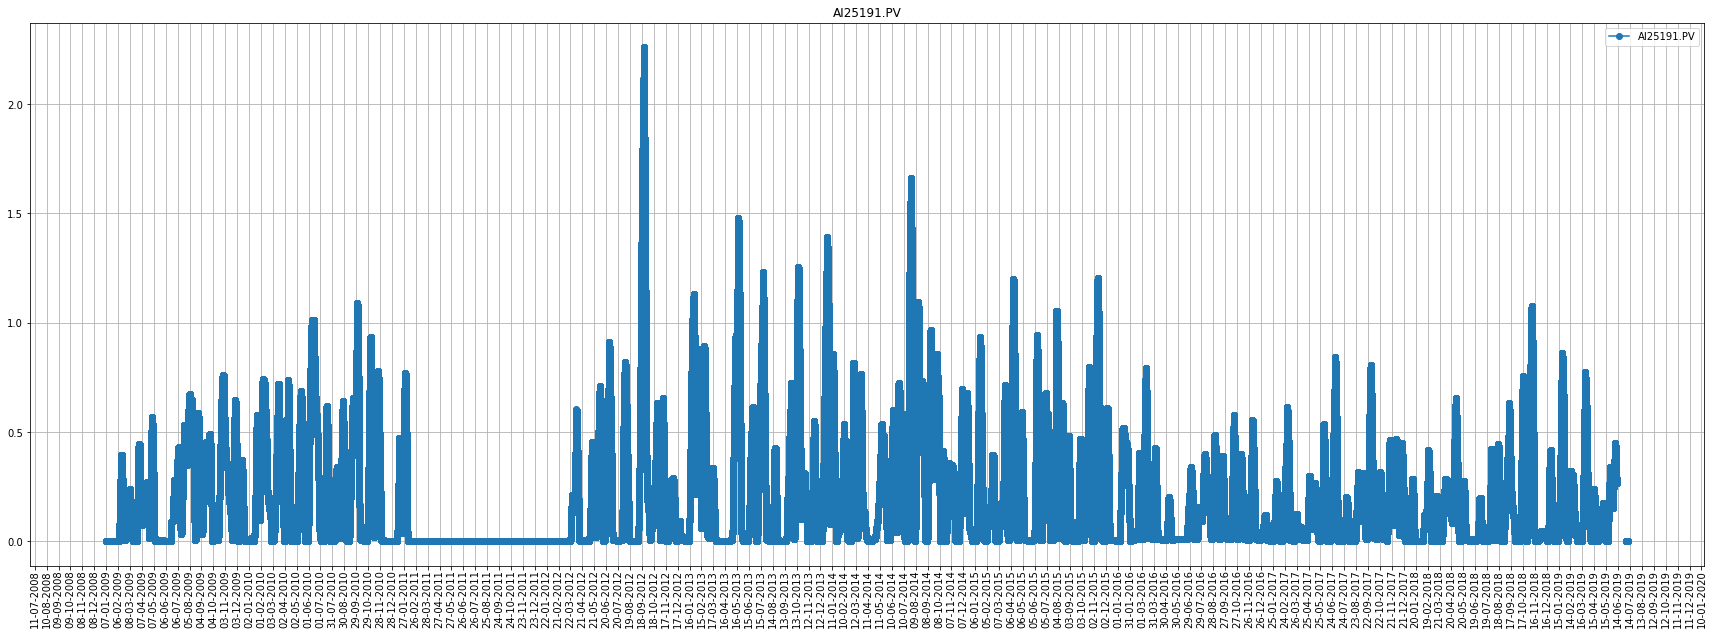

(5517491, 1)


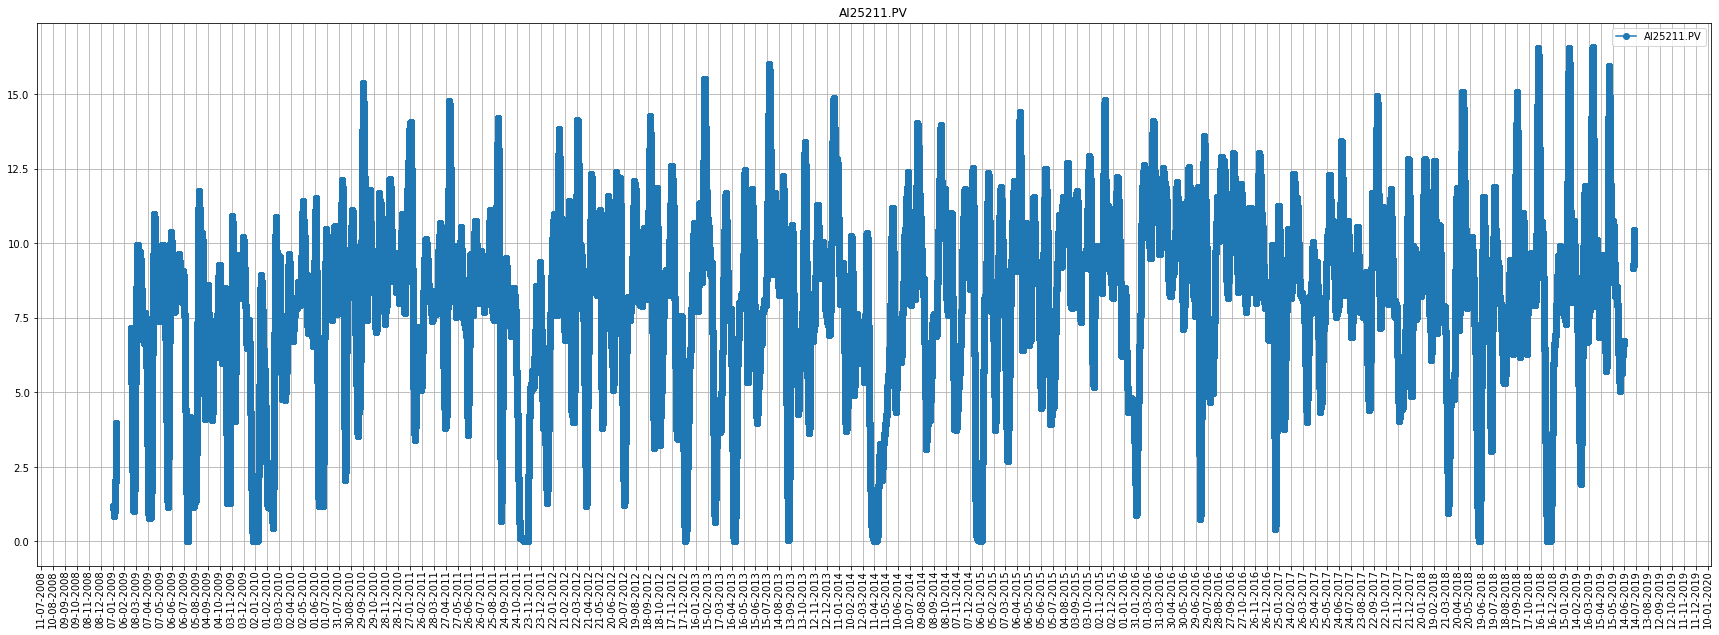

In [9]:
start_date ='2009-01-01 00:00:00'
end_date = '2019-10-30 23:59:00'
days_interval = 30
minutes_interval = 60*12
roling = [7*60*24]
for tag in tags['302A']:
    plot_variables_rolling_V2(data,[tag],legend=[tag],reference_line=[],
                           rolling_time=roling,
                           minutes_interval=minutes_interval,start_date=start_date,end_date=end_date,days_interval=days_interval);

### 3. A partir de 2015

(2371445, 1)


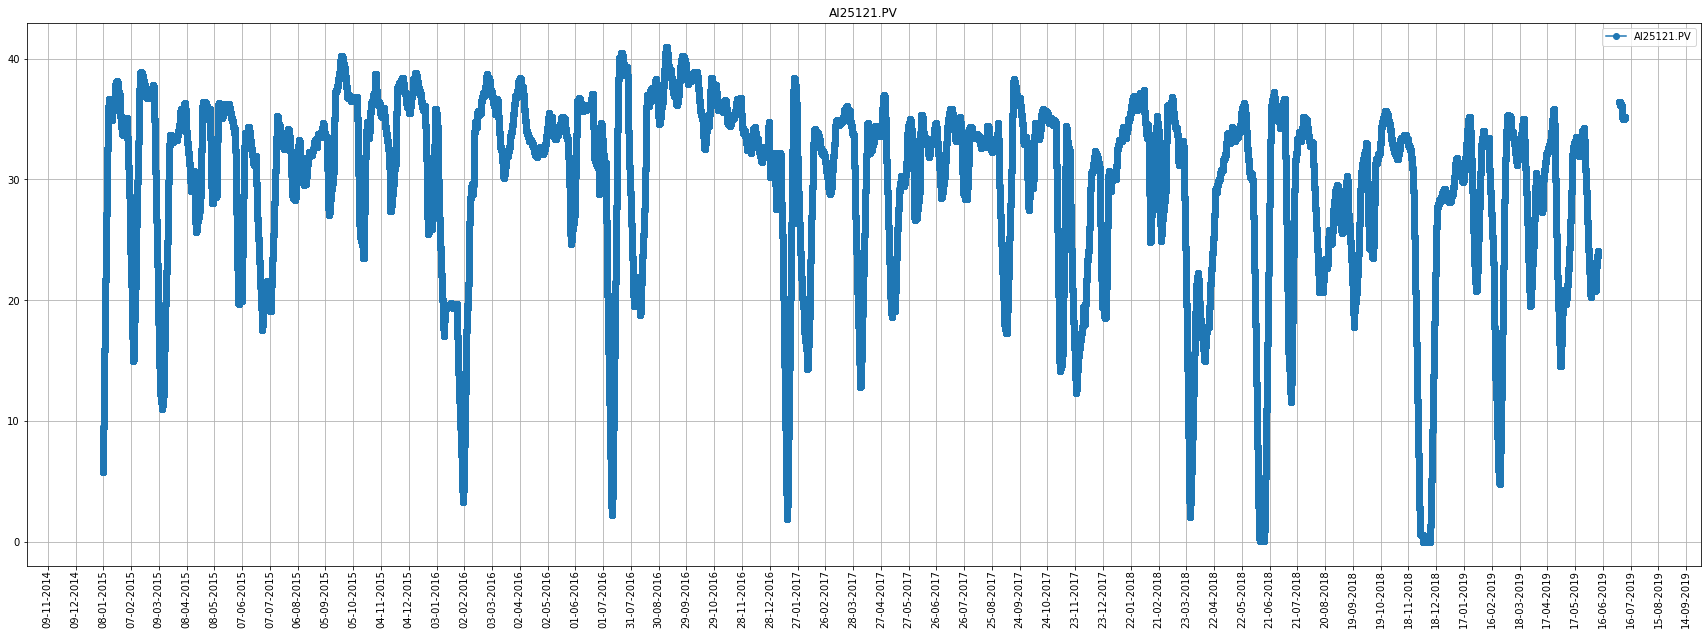

(2371445, 1)


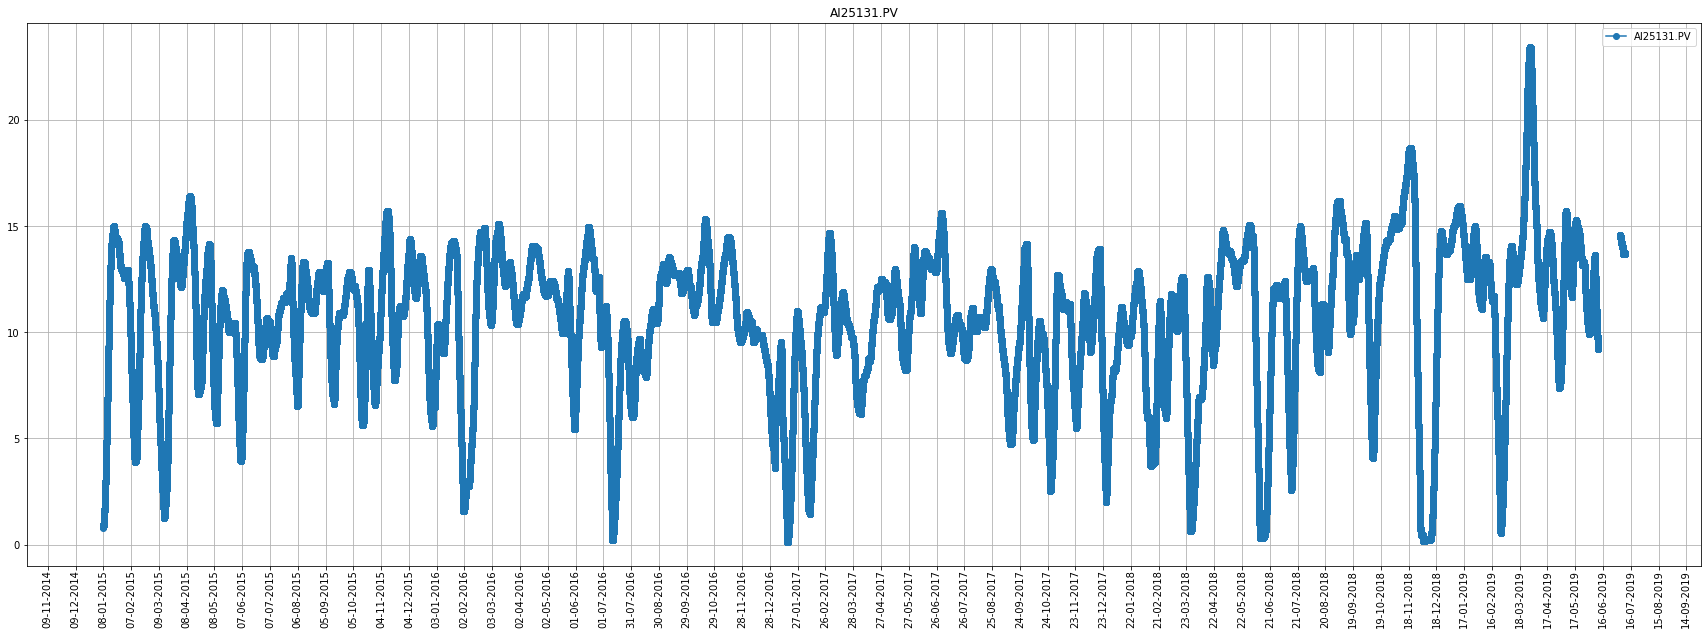

(2371445, 1)


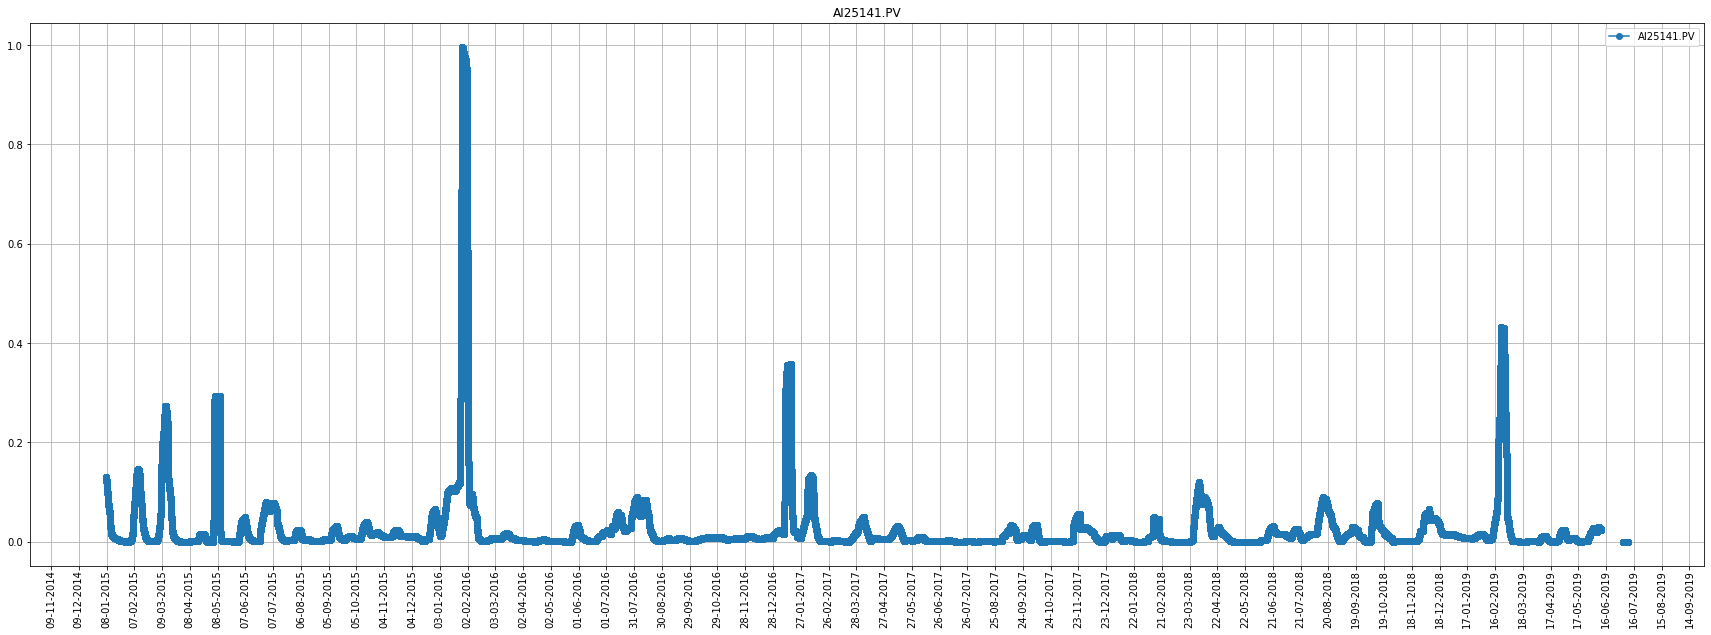

(2371445, 1)


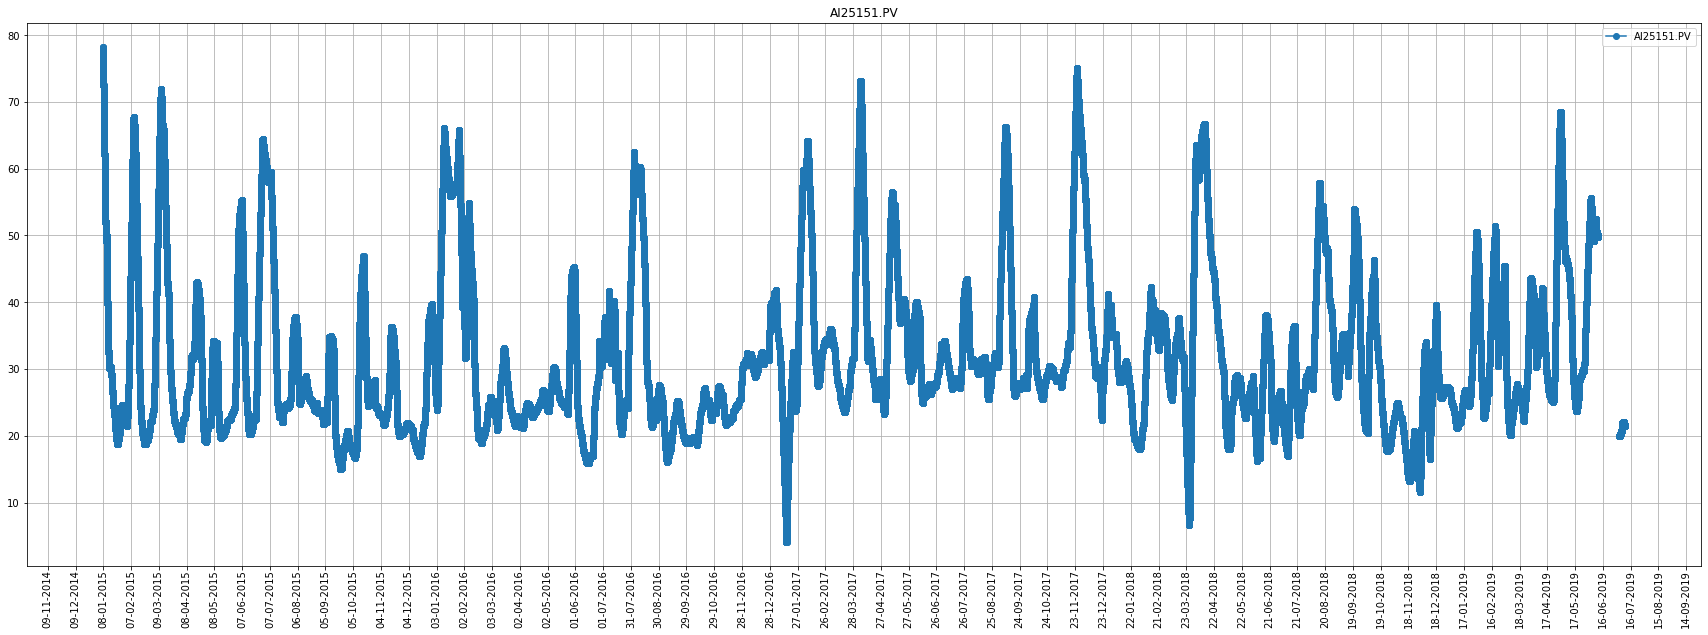

(2371445, 1)


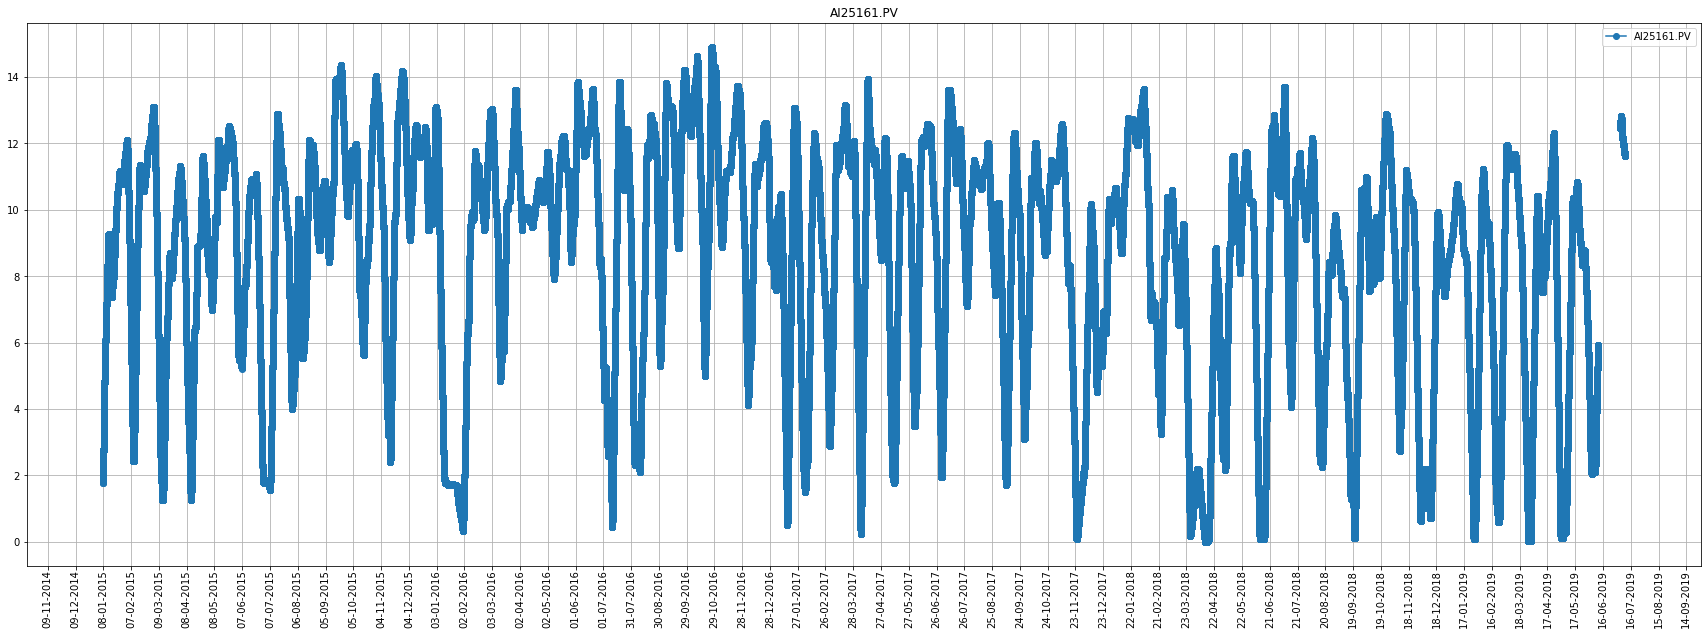

(2371445, 1)


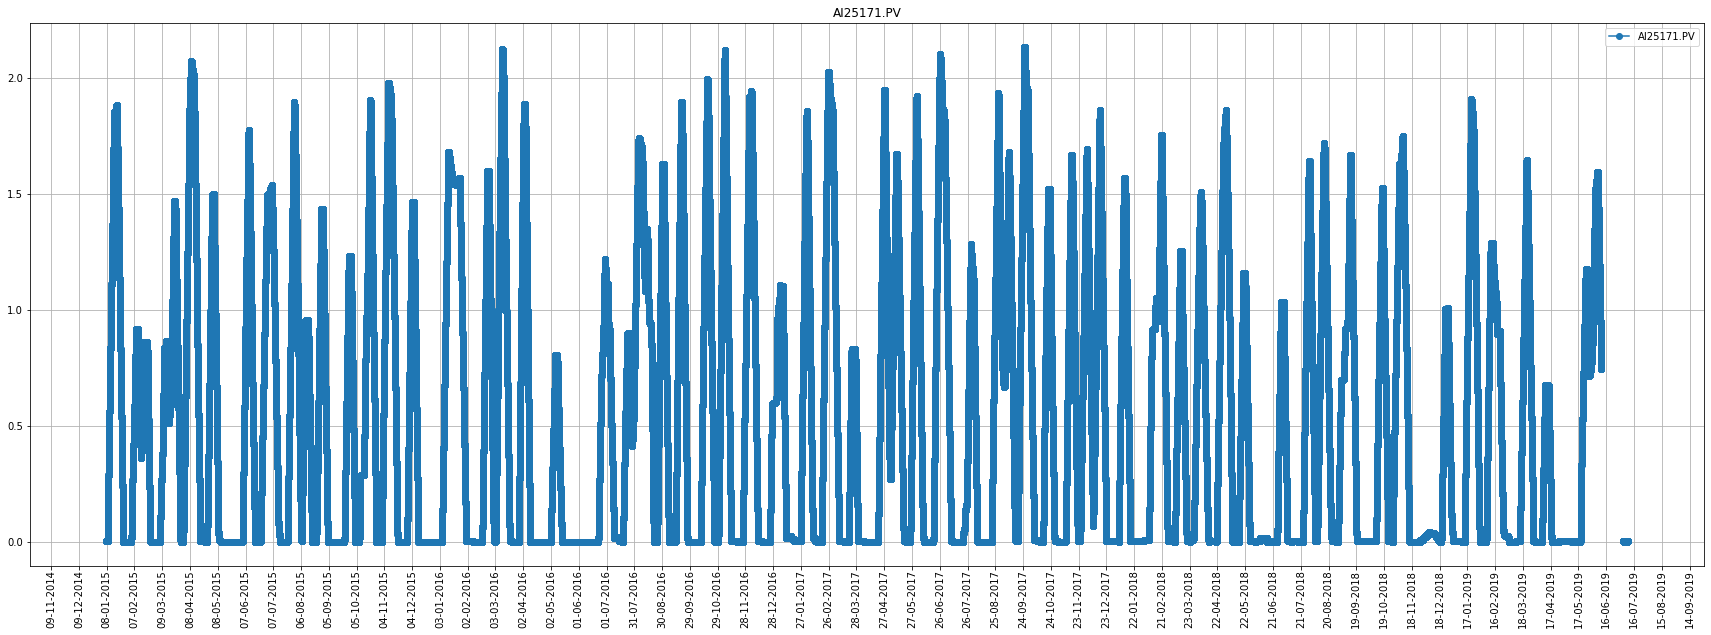

(2371445, 1)


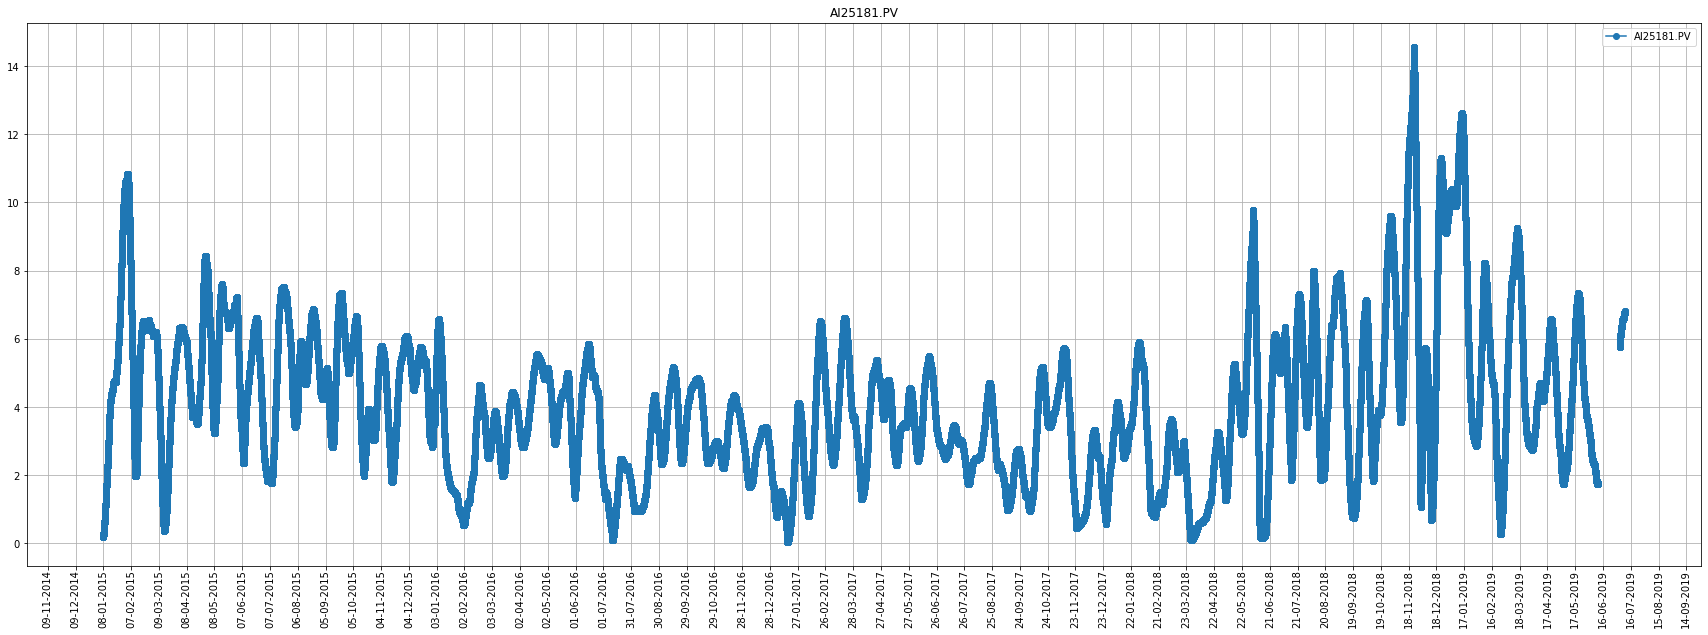

(2371445, 1)


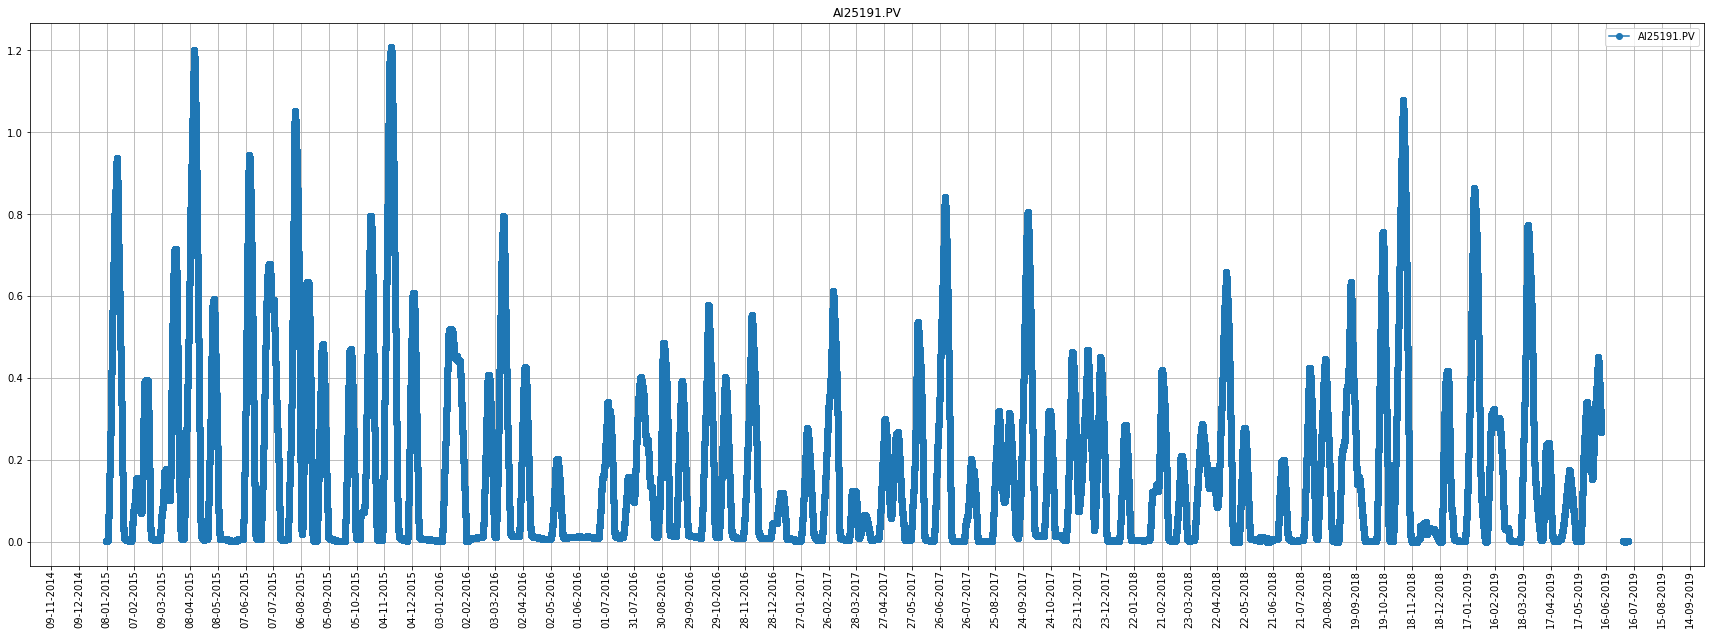

(2371445, 1)


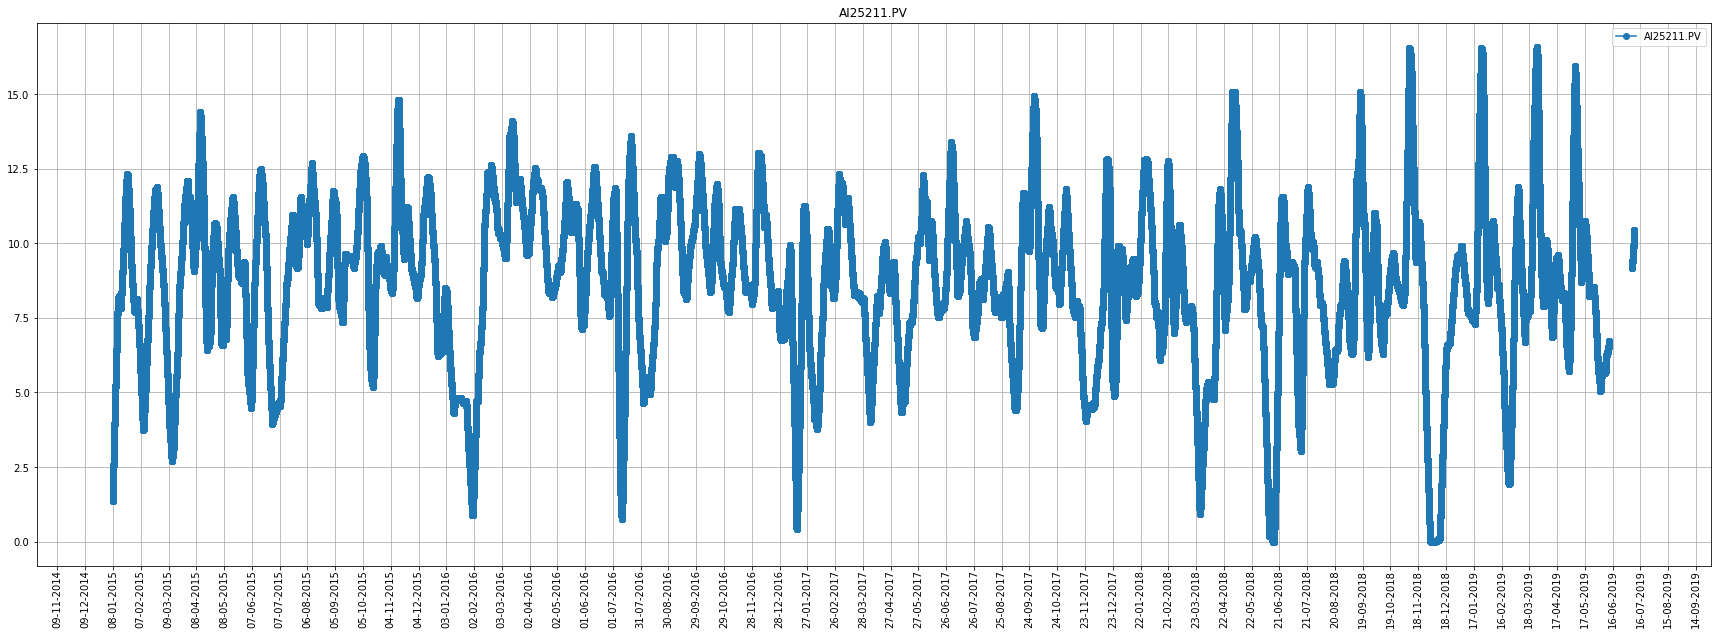

In [10]:
start_date ='2015-01-01 00:00:00'
end_date = '2019-10-30 23:59:00'
days_interval = 30
minutes_interval = 60*12
roling = [7*60*24]
for tag in tags['302A']:
    plot_variables_rolling_V2(data,[tag],legend=[tag],reference_line=[],
                           rolling_time=roling,
                           minutes_interval=minutes_interval,start_date=start_date,end_date=end_date,days_interval=days_interval);

In [11]:
data.sort_index(inplace = True)
data_2015 = data.loc[start_date:]   # pegando os dados a partir de 2015

In [13]:
#descricao_tag = {'XI3403.PV': 'VIB VERTICAL 1o ESTAGIO', 'XI3404.PV':'VIB HORIZONTAL 1o ESTAGIO', 'XI3405.PV': 'VIB VERTICAL 2o ESTAGIO', 'XI3406.PV': 'VIB HORIZONTAL 1o ESTAGIO'}
#data_2015.rename(columns = descricao_tag, inplace = True)
#data_2015.columns

In [14]:
data_2015.describe()

,AI25121.PV,AI25131.PV,AI25141.PV,AI25151.PV,AI25161.PV,AI25171.PV,AI25181.PV,AI25191.PV,AI25211.PV
count,2.348043e+06,2.348042e+06,2.348042e+06,2.348042e+06,2.348042e+06,2.348042e+06,2.348043e+06,2.348043e+06,2.365779e+06
mean,2.983201e+01,1.063649e+01,2.582166e-02,3.178055e+01,8.583200e+00,5.246756e-01,4.031024e+00,1.737018e-01,8.724029e+00
std,1.009967e+01,4.359964e+00,1.716038e-01,1.600302e+01,4.681330e+00,8.345767e-01,2.594883e+00,2.967704e-01,3.665749e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.785600e+01,8.831000e+00,0.000000e+00,2.179200e+01,5.888000e+00,0.000000e+00,2.158000e+00,4.000000e-03,7.054000e+00
50%,3.335200e+01,1.139100e+01,4.000000e-03,2.714300e+01,1.000800e+01,0.000000e+00,3.702000e+00,1.200000e-02,8.635000e+00
75%,3.616600e+01,1.351600e+01,1.600000e-02,3.515400e+01,1.215300e+01,1.472000e+00,5.525000e+00,2.580000e-01,1.106600e+01
max,7.000000e+01,5.000000e+01,1.000000e+01,1.000000e+02,3.500000e+01,1.000000e+01,2.000000e+01,1.000000e+01,2.312200e+01


Considerações finais: